# タイタニックをランダムフォレストで予測する
(参考URL)[http://www.randpy.tokyo/entry/python_random_forest]

In [1]:
import pandas as pd
df = pd.read_csv('../data/train.csv')

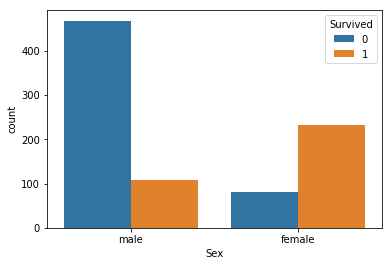

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot('Sex',hue='Survived',data=df)

# 欠損値や変数の変換

In [4]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/train.csv')

#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X = df.drop('Survived', axis=1)
train_y = df.Survived
(train_X, test_X ,train_y, test_y) = train_test_split(
                                        train_X, train_y, test_size = 0.3,
                                        random_state = 666)


# 決定木で学習する

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

# 決定木の学習精度を評価する

In [6]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.7947761194029851

# 決定木を可視化する

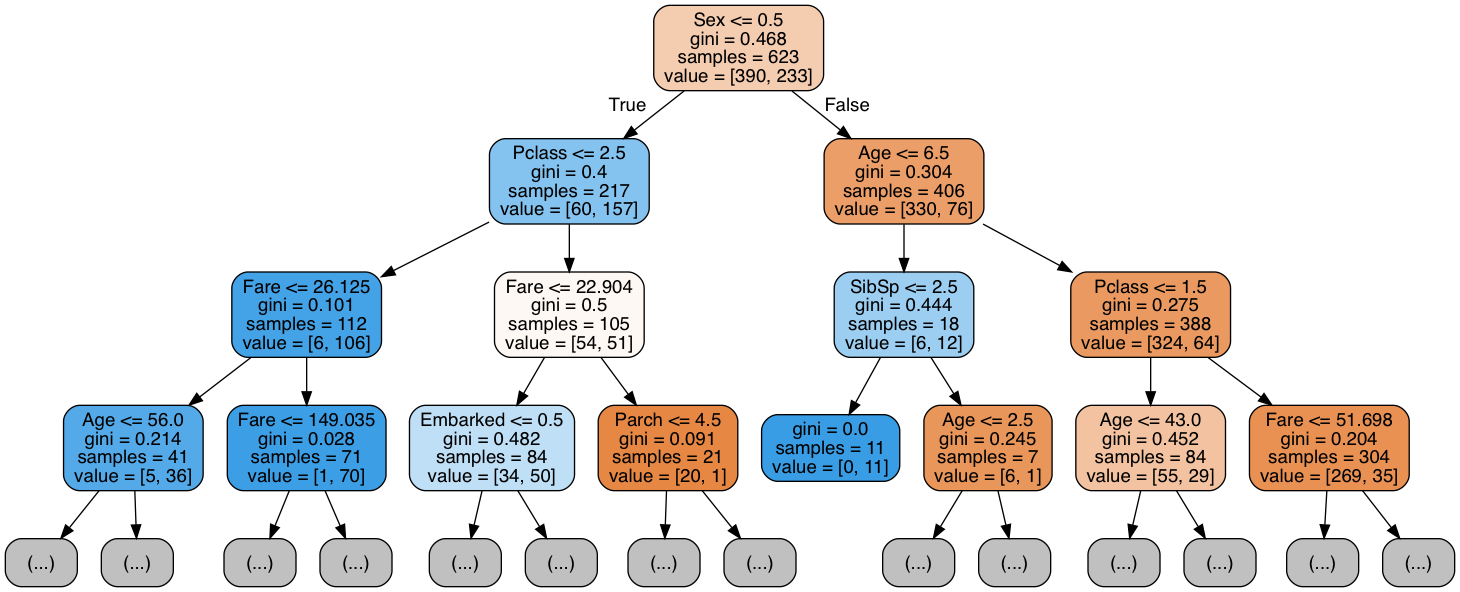

In [8]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                feature_names=train_X.columns, 
                #class_names=iris.target_names, #ここ作ってる最中
                filled=True, rounded=True, max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# ランダムフォレストで予測モデルを作る

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8022388059701493

# ランダムフォレストの重要変数を可視化する

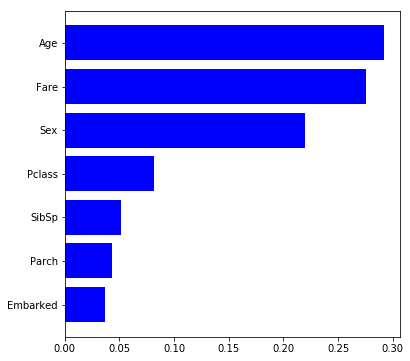

In [10]:
import matplotlib.pyplot as plt
import numpy as np

features = train_X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()